<a href="https://colab.research.google.com/github/grommy/CNN_in_TensorFlow/blob/master/week4/Sign_language_TransferLearning_architecture_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import cv2

import matplotlib.pyplot as plt

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/CNN_in_TF/Week4/sign-language-mnist

american_sign_language.PNG  amer_sign3.png	 sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test.csv


In [0]:
!cp '/content/gdrive/My Drive/Colab Notebooks/CNN_in_TF/Week4/sign-language-mnist/sign_mnist_train.csv' .
!cp '/content/gdrive/My Drive/Colab Notebooks/CNN_in_TF/Week4/sign-language-mnist/sign_mnist_test.csv' .

In [8]:
import pandas as pd
X_train = pd.read_csv('sign_mnist_train.csv', nrows=100)
X_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [9]:
! ls

first_image.jpg  model.h5     sign_mnist_test.csv   transfer_model.h5
gdrive		 sample_data  sign_mnist_train.csv


In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    images_list = []
    labels_list = []    
    with open(filename) as training_file:
      training_file.readline()
      print("working with %s" % filename)
      # Your code starts here
      for _, line in enumerate(training_file):
        row = [int(i) for i in line.split(',')]
        labels_list.append(row[0])
        images_list.append(row[1:785])
        
      images = np.reshape(images_list, (-1,28,28))
      labels = np.array(labels_list)
      
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

working with sign_mnist_train.csv
working with sign_mnist_test.csv
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
training_images_retyped = training_images.astype('uint8')


In [0]:
IMG_SIZE = 32
img_resized = cv2.resize(training_images_retyped[0], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_LINEAR)

In [0]:
import imageio
imageio.imwrite('first_image.jpg', img_resized)

In [14]:
!ls

first_image.jpg  model.h5     sign_mnist_test.csv   transfer_model.h5
gdrive		 sample_data  sign_mnist_train.csv


In [15]:
img_gray = np.expand_dims(training_images[0], 2)
img_gray.shape

(28, 28, 1)

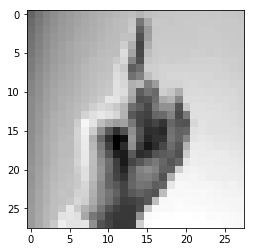

In [16]:
plt.imshow(training_images[0], cmap='gray');

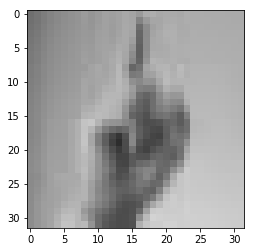

In [17]:
image = cv2.imread('first_image.jpg')
plt.imshow(image);

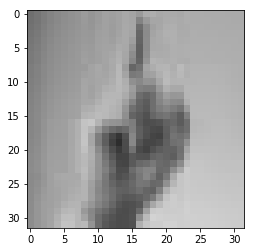

In [18]:
image_clr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_clr);

In [19]:
print(training_images[0].shape)
print(image.shape)
print(image_clr.shape)

(28, 28)
(32, 32, 3)
(32, 32, 3)


In [0]:
IMG_SIZE = 32

TRAIN_DATA_DIR = "/tmp/train_signs/"
VALIDATION_DATA_DIR = "/tmp/test_signs/"

In [0]:
!rm -r $TRAIN_DATA_DIR
!rm -r $VALIDATION_DATA_DIR

!mkdir $TRAIN_DATA_DIR
!mkdir $VALIDATION_DATA_DIR

In [26]:
def images_to_rgb(images_array, labels_array, save_dir, target_size):
  
  for label in np.unique(labels_array):
    label_dir = os.path.join(save_dir, str(label))
    try:
      os.stat(label_dir)
    except:
      os.mkdir(label_dir) 
    
  count = 0
  images_array_retyped = images_array.astype('uint8')
  for ar, label in zip(images_array_retyped, labels_array):
    img_resized = cv2.resize(ar, (target_size, target_size), interpolation=cv2.INTER_LINEAR)
    filename = os.path.join(save_dir, str(label), "{}.jpg".format(str(count)))
    imageio.imwrite(filename, img_resized)
    count += 1
    
  # after done 
  print(count, "images")
  

training_images_rgb = images_to_rgb(training_images, training_labels, TRAIN_DATA_DIR, IMG_SIZE)
testing_images_rgb = images_to_rgb(testing_images, testing_labels, VALIDATION_DATA_DIR, IMG_SIZE)

27455 images
7172 images


In [27]:
print(len(os.listdir(TRAIN_DATA_DIR)))
print(len(os.listdir(VALIDATION_DATA_DIR)))

24
24


In [28]:
NUM_CLASSES = len(np.unique(training_labels))
print(len(np.unique(training_labels)))

training_labels_cat = tf.keras.utils.to_categorical(training_labels, dtype='int')
testing_labels_cat = tf.keras.utils.to_categorical(testing_labels, dtype='int')
print(training_labels_cat[0])
print(testing_labels_cat[0])

24
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Use Transfer Learning

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [31]:
pre_trained_model = InceptionV3(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = None)
# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model.load_weights("imagenet")

W0718 08:39:50.635696 140669239826304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# from tensorflow.keras.applications import ResNet50
# pre_trained_model = ResNet50(input_shape = (28, 28, 1), 
#                                 include_top = False, 
#                                 weights = None)

In [33]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, \
  GlobalAveragePooling2D, Conv2D
from tensorflow.keras.models import Sequential


def build_tl_model(original_model, num_classes, num_layer_to_drop=0, save_file=None):
  """
  Perform 'surgery' on a pretrained model. Then add layers to create a new model
  that has just one final, trainable layer with softmax activation for 
  multi-class output.
  """
  # ______________________________________________________________________________
  # Extract needed info from pre-trained model.
  bottleneck_input  = original_model.get_layer(index=0).input
  bottleneck_output = original_model.get_layer('mixed0').output
  bottleneck_model = Model(inputs=bottleneck_input, outputs=bottleneck_output)

  # ______________________________________________________________________________
  # Freeze these layers so we are not retraining the full model. 
#   for layer in bottleneck_model.layers:
#     layer.trainable = False

  # ______________________________________________________________________________
  # Build new transfer learning model.
  new_model = Sequential()
  new_model.add(bottleneck_model)
#   new_model.add(Conv2D(10, kernel_size=(3,3), activation='relu'))
  new_model.add(GlobalAveragePooling2D())
  new_model.add(Dense(64, activation="relu"))
  new_model.add(Dense(num_classes, activation="softmax"))

#   NUM_CLASSES = len(os.listdir(IMG_DIR))  # How many image classes are in our new data?
  BOTTLENECK_DIM = bottleneck_output.shape.dims[1]  # The number of nodes in the second to last layer of the pre-trained model.
  print(BOTTLENECK_DIM)                    

  if save_file:
    new_model.save(save_file)

  return new_model

In [35]:
transfer_model = build_tl_model(pre_trained_model, num_classes=NUM_CLASSES)
transfer_model.summary()

7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 7, 7, 256)         429440    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
Total params: 447,448
Trainable params: 445,720
Non-trainable params: 1,728
_________________________________________________________________


In [0]:
# Compile Model. 
from tensorflow.keras.optimizers import RMSprop
transfer_model.compile(optimizer=RMSprop(lr=1e-2), loss='categorical_crossentropy', metrics=['acc'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

transfer_checkpoint = ModelCheckpoint(filepath='transfer_model_random_weights.h5',
                             monitor='val_acc', 
                             save_best_only=True, 
                             load_weights_on_restart=True,
                            )
transfer_earlystopping = EarlyStopping(monitor='val_acc',
                             patience=2)

In [0]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)



In [43]:
BS = 32

transfer_train_data_iterator = \
  train_datagen.flow_from_directory(TRAIN_DATA_DIR, 
                                    target_size=(75, 75),
                                    batch_size=BS,
                                    class_mode="categorical"
                                   )
transfer_validation_data_iterator = \
  validation_datagen.flow_from_directory(TRAIN_DATA_DIR, 
                                         target_size=(75, 75),
                                         batch_size=BS,
                                         class_mode="categorical"
                                        )

Found 27455 images belonging to 24 classes.
Found 27455 images belonging to 24 classes.


In [44]:
# Train the Model
BS = 32
EPOCHS = 10

transfer_history = transfer_model.fit_generator(
     transfer_train_data_iterator,
	   validation_data=transfer_validation_data_iterator,
	   steps_per_epoch=len(training_images) // BS,
     epochs=EPOCHS,
     callbacks=[transfer_checkpoint, transfer_earlystopping]
)

Epoch 1/10
857/857 [==============================] - 216s 252ms/step - loss: 2.5580 - acc: 0.1709 - val_loss: 4.2298 - val_acc: 0.0924
Epoch 2/10
857/857 [==============================] - 205s 239ms/step - loss: 1.5206 - acc: 0.4688 - val_loss: 3.9881 - val_acc: 0.1978
Epoch 3/10
857/857 [==============================] - 201s 234ms/step - loss: 0.7950 - acc: 0.7206 - val_loss: 6.0744 - val_acc: 0.2036
Epoch 4/10
857/857 [==============================] - 186s 217ms/step - loss: 0.4715 - acc: 0.8413 - val_loss: 1.0059 - val_acc: 0.6858
Epoch 5/10
857/857 [==============================] - 125s 146ms/step - loss: 0.3019 - acc: 0.8989 - val_loss: 0.9879 - val_acc: 0.7666
Epoch 6/10
857/857 [==============================] - 127s 148ms/step - loss: 0.2289 - acc: 0.9232 - val_loss: 0.9588 - val_acc: 0.7921
Epoch 7/10
857/857 [==============================] - 125s 146ms/step - loss: 0.1836 - acc: 0.9414 - val_loss: 0.3994 - val_acc: 0.8777
Epoch 8/10
857/857 [============================

In [49]:
best_model = tf.keras.models.load_model('transfer_model_random_weights.h5')

W0718 09:47:42.928776 140669239826304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0718 09:47:42.935232 140669239826304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0718 09:47:42.939209 140669239826304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

In [50]:
best_model.evaluate_generator(transfer_train_data_iterator)
    
# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]

[0.40851046258012713, 0.8966673]

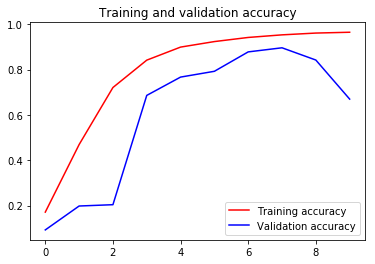

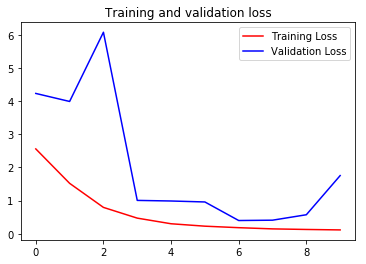

In [46]:
# Plot the chart for accuracy and loss on both training and validation
history = transfer_history

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()